In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [60]:
games = pd.read_csv("games.csv")

In [61]:
elo_w = games['white_rating']
elo_b = games['black_rating']
elo = np.hstack((elo_w,elo_b))
# Caclul du nombre total de joueurs différents
id_players = np.hstack((np.array(games['black_id']),np.array(games['white_id'])))
id_player = np.unique(id_players)


Nombre total de parties :  20058
Nombre total de joueurs différents : 15635
Moyenne du classement élo des joueurs sur chaque partie : 1592.73
Médiane du classement élo des joueurs sur chaque partie : 1564.0
Classement élo maximum : 2723
Classement élo minimum : 784


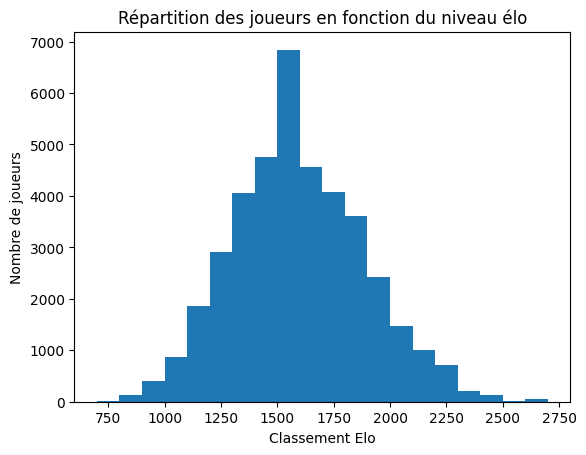

In [62]:
# Visualisation des données sous la forme de graphiques
average_rating = np.round(np.mean(elo),2);
median_rating = np.round(np.median(elo),2);
plt.hist(elo,bins=range(700,2800,100))
plt.title("Répartition des joueurs en fonction du niveau élo");
plt.xlabel("Classement Elo");
plt.ylabel("Nombre de joueurs");
print("Nombre total de parties : ",games.shape[0])
print("Nombre total de joueurs différents :",id_player.size)
print("Moyenne du classement élo des joueurs sur chaque partie :",average_rating)
print("Médiane du classement élo des joueurs sur chaque partie :",median_rating)
print("Classement élo maximum :",np.max(elo))
print("Classement élo minimum :",np.min(elo))

In [63]:
#Pourquoi autant de joueurs aux alentours de 1500 élo
elo_1500 = np.size(elo[(elo>=1400)&(elo<=1600)])
print("Pourcentage de joueurs entre 1400 et 1600 élo : ",np.round(elo_1500/20058*100,2),"%")
elo_1500 = np.size(elo[(elo==1500)])
print("Pourcentage de joueurs à exactemet 1500 élo : ",np.round(elo_1500/20058*100,2),"%")

Pourcentage de joueurs entre 1400 et 1600 élo :  58.15 %
Pourcentage de joueurs à exactemet 1500 élo :  8.02 %


Nb. victoires blancs : 10001 
N.b victoires énoirs : 9107 
match nul : 950


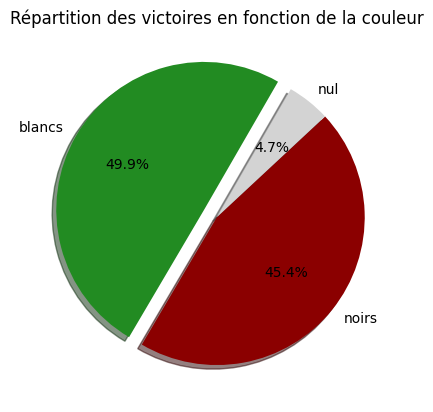

In [64]:
# Visualisation de la répartition des résultats des parties en fonction de la couleur

w_white = games[games['winner'] == 'white'].shape[0]
w_black = games[games['winner'] == 'black'].shape[0]
draw = games[games['winner']=='draw'].shape[0]
labels = 'blancs','noirs','nul'
fig, ax = plt.subplots()
ax.pie([w_white,w_black,draw],explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%',colors=['forestgreen','darkred','lightgrey'],shadow=True, startangle=60)
plt.title("Répartition des victoires en fonction de la couleur");
print("Nb. victoires blancs :",w_white,"\nN.b victoires énoirs :",w_black,"\nmatch nul :",draw)

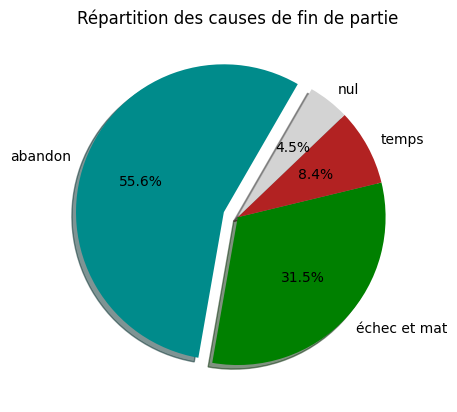

In [65]:
# Visualisation des causes de fin de partie
res = games[games['victory_status']== 'resign'].shape[0]
mate = games[games['victory_status']== 'mate'].shape[0]
tim = games[games['victory_status']== 'outoftime'].shape[0]
draw = games[games['victory_status']== 'draw'].shape[0]
labels2 = 'abandon','échec et mat','temps','nul'
fig, ax = plt.subplots()
ax.pie([res,mate,tim,draw], labels=labels2, autopct='%1.1f%%',shadow=True,explode = (0.1, 0, 0,0),startangle=60,colors=['darkcyan','green','firebrick','lightgrey'])
plt.title("Répartition des causes de fin de partie");

In [66]:
games['diff_elo'] = games['white_rating'] - games['black_rating']
#Notons alors que la différence d'élo est supérieur à 0 si les blancs ont un élo supérieur à celui des noirs et est négative si les noirs ont un élo supérieur à celui des blancs

Nb victoires élo supérieur : 12352 
Nb victoires élo inférieur : 6566 
match nul : 950 
total : 19868


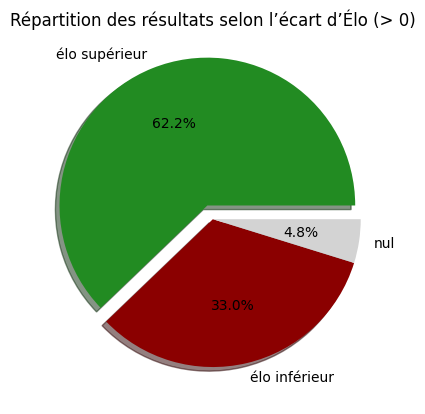

In [67]:
m = 0
elo_sup = games[(games['winner']=='white')&(games['diff_elo']>m)].shape[0] + games[(games['winner']=='black')&(games['diff_elo']<-m)].shape[0]
elo_inf = games[(games['winner']=='black')&(games['diff_elo']>m)].shape[0] + games[(games['winner']=='white')&(games['diff_elo']<-m)].shape[0]
draw = games[(games['winner']=='draw')&(games['diff_elo']<-m)].shape[0] + games[(games['winner']=='draw')&(games['diff_elo']>=m)].shape[0]
fig, ax = plt.subplots()
labels3 = 'élo supérieur','élo inférieur','nul'
ax.pie([elo_sup,elo_inf,draw], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0,0),colors=['forestgreen','darkred','lightgrey'])
plt.title("Répartition des résultats selon l’écart d’Élo (> 0)");
print("Nb victoires élo supérieur :",elo_sup,"\nNb victoires élo inférieur :",elo_inf,"\nmatch nul :",draw,"\ntotal :",draw+elo_sup+elo_inf)

Nb victoires élo supérieur : 7762 
Nb victoires élo inférieur : 2725 
Nb match nul : 464 
Nb total de parties : 10951


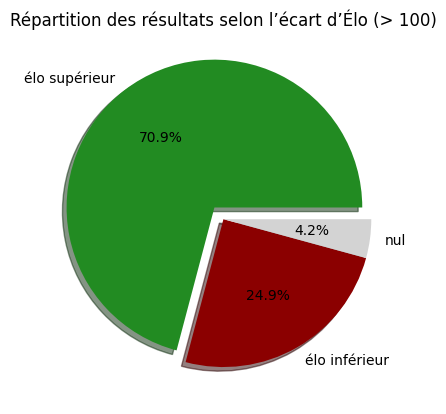

In [68]:
# Cas de différence d'élo

m = 100
elo_sup = games[(games['winner']=='white')&(games['diff_elo']>=m)].shape[0] + games[(games['winner']=='black')&(games['diff_elo']<=-m)].shape[0]
elo_inf = games[(games['winner']=='black')&(games['diff_elo']>=m)].shape[0] + games[(games['winner']=='white')&(games['diff_elo']<=-m)].shape[0]
draw = games[(games['winner']=='draw')&(games['diff_elo']<=-m)].shape[0] + games[(games['winner']=='draw')&(games['diff_elo']>=m)].shape[0]
fig, ax = plt.subplots()
labels3 = 'élo supérieur','élo inférieur','nul'
ax.pie([elo_sup,elo_inf,draw], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0,0),colors=['forestgreen','darkred','lightgrey'])
plt.title("Répartition des résultats selon l’écart d’Élo (> 100)");
print("Nb victoires élo supérieur :",elo_sup,"\nNb victoires élo inférieur :",elo_inf,"\nNb match nul :",draw,"\nNb total de parties :",draw+elo_sup+elo_inf)

Nb victoires élo supérieur : 4901 
Nb victoires élo inférieur : 1207 
Nb match nul : 242 
Nb total de parties : 6350


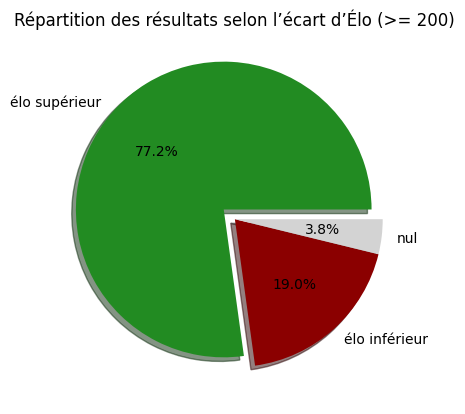

In [69]:
# Cas de différence d'élo absurde

m = 200
elo_sup = games[(games['winner']=='white')&(games['diff_elo']>=m)].shape[0] + games[(games['winner']=='black')&(games['diff_elo']<=-m)].shape[0]
elo_inf = games[(games['winner']=='black')&(games['diff_elo']>=m)].shape[0] + games[(games['winner']=='white')&(games['diff_elo']<=-m)].shape[0]
draw = games[(games['winner']=='draw')&(games['diff_elo']<=-m)].shape[0] + games[(games['winner']=='draw')&(games['diff_elo']>=m)].shape[0]
fig, ax = plt.subplots()
labels3 = 'élo supérieur','élo inférieur','nul'
ax.pie([elo_sup,elo_inf,draw], labels=labels3, autopct='%1.1f%%',shadow=True,explode=(0.1,0,0),colors=['forestgreen','darkred','lightgrey'])
plt.title("Répartition des résultats selon l’écart d’Élo (>= 200)");
print("Nb victoires élo supérieur :",elo_sup,"\nNb victoires élo inférieur :",elo_inf,"\nNb match nul :",draw,"\nNb total de parties :",draw+elo_sup+elo_inf)

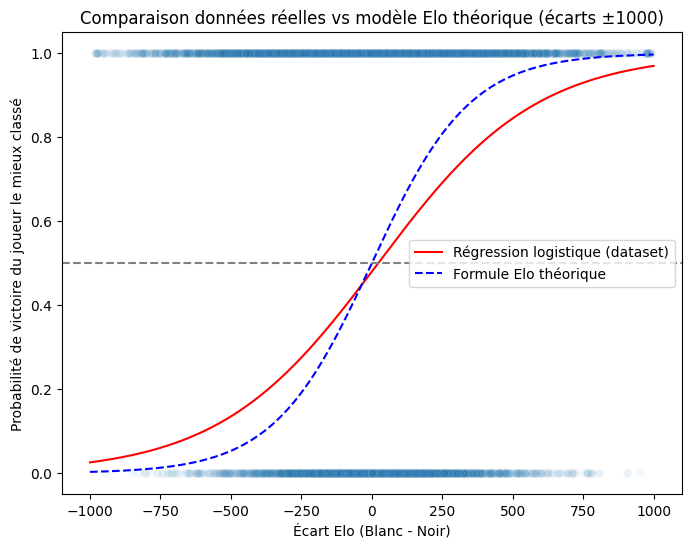

In [70]:
# Déterminer le joueur le mieux classé et s'il a gagné
games["stronger_wins"] = (
    ((games["diff_elo"] > 0) & (games["winner"] == "white")) |
    ((games["diff_elo"] < 0) & (games["winner"] == "black"))
).astype(int)

# Filtrer sur un écart d'élo de [-1000, 1000]
filtered = games[(games["diff_elo"].between(-1000, 1000))].dropna(subset=["stronger_wins"])

X = (np.abs(filtered["diff_elo"])).values.reshape(-1, 1)
y = filtered["stronger_wins"].values

#Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

#Courbe prédictive
x_vals = np.linspace(-1000, 1000, 1000).reshape(-1, 1)
x_vals_scaled = scaler.transform(x_vals)
y_pred = log_reg.predict_proba(x_vals_scaled)[:, 1]

#Tracé
plt.figure(figsize=(8,6))
sns.scatterplot(x="diff_elo", y="stronger_wins", data=filtered, alpha=0.05)
plt.plot(x_vals, y_pred, color="red", label="Régression logistique (dataset)")

# Ajout du modèle Elo théorique pour comparaison
c = 400 / np.log(10)
elo_model = 1 / (1 + np.exp(-x_vals / c))
plt.plot(x_vals, elo_model, "b--", label="Formule Elo théorique")

plt.axhline(0.5, color="grey", linestyle="--")
plt.xlabel("Écart Elo (Blanc - Noir)")
plt.ylabel("Probabilité de victoire du joueur le mieux classé")
plt.title("Comparaison données réelles vs modèle Elo théorique (écarts ±1000)")
plt.legend()
plt.show()